# Introduction
In this notebook we will look at how offensive efficiency rating has changed from 2003 to 2019.

# Notebook Objectives
We are interested in three questions:
1. How has offensive efficiency changed since 2003?<br><br>
2. How has defensive efficiency changed since 2003?<br><br>
2. How has the pace of the game changed since 2003?

# Setup
## Imports

In [28]:
from datetime import datetime, timedelta

import pandas as pd

import numpy as np

import matplotlib.pylab as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter

import seaborn as sns

import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

## Parameters

In [29]:
TEAM_SEASONAL_EFFICIENCY_DATASET = '../../../data/processed/111_seasonal_efficiency.csv'

EFFICIENCY_RATING_DATASET = '../../../data/processed/110_team_efficiency.csv'

## Configuration

In [30]:
%matplotlib inline

sns.set_context('talk')
sns.set_style("white")

# Read in data

In [31]:
seasonal_df = pd.read_csv(TEAM_SEASONAL_EFFICIENCY_DATASET)
seasonal_df.dtypes

SEASON               int64
TEAM_ID              int64
TEAM_NAME           object
GAME_ID              int64
FGM                float64
FGA                float64
FG_PCT             float64
FG3M               float64
FG3A               float64
FG3_PCT            float64
FTM                float64
FTA                float64
FT_PCT             float64
OREB               float64
DREB               float64
REB                float64
AST                float64
STL                float64
BLK                float64
TO                 float64
PF                 float64
PTS                float64
POSSESSIONS        float64
PPP                float64
OER                float64
OPP_PTS            float64
DER                float64
POSSESSIONS_OPP    float64
NER                float64
OPP_PPP            float64
CONFERENCE          object
dtype: object

In [32]:
seasonal_df = seasonal_df.set_index(['SEASON', 'TEAM_NAME'])
seasonal_df.head()

TEAM_ID     GAME_ID     FGM     FGA    FG_PCT   FG3M  \
SEASON TEAM_NAME                                                            
2003   Hawks      1610612737  1674947672  2857.0  6609.0  0.432289  422.0   
       Celtics    1610612738  1836147889  2994.0  6775.0  0.441919  577.0   
       Cavaliers  1610612739  1685248550  2992.0  6903.0  0.433435  254.0   
       Pelicans   1610612740  1946749139  2977.0  7139.0  0.417005  572.0   
       Bulls      1610612741  1654647953  2781.0  6721.0  0.413778  425.0   

                    FG3A   FG3_PCT     FTM     FTA  ...     PTS  POSSESSIONS  \
SEASON TEAM_NAME                                    ...                        
2003   Hawks      1256.0  0.335987  1555.0  2004.0  ...  7691.0       7467.0   
       Celtics    1676.0  0.344272  1673.0  2229.0  ...  8238.0       7917.0   
       Cavaliers   804.0  0.315920  1564.0  2087.0  ...  7802.0       7576.0   
       Pelicans   1796.0  0.318486  1567.0  2082.0  ...  8093.0       7813.0   
       Bulls      1241.0  0.342466  1329.0  1835.0  ...  7316.0       7432.0   

                       PPP         OER  OPP_PTS         DER  POSSESSIONS_OPP  \
SEASON TEAM_NAME                                                               
2003   Hawks      1.029999  102.999866   8075.0  108.084594           7471.0   
       Celtics    1.040546  104.054566   8439.0  105.672427           7986.0   
       Cavaliers  1.029831  102.983105   8010.0  105.826397           7569.0   
       Pelicans   1.035838  103.583771   8122.0  104.154912           7798.0   
       Bulls      0.984392   98.439182   7829.0  105.285100           7436.0   

                       NER   OPP_PPP  CONFERENCE  
SEASON TEAM_NAME                                  
2003   Hawks     -5.084728  1.080846        East  
       Celtics   -1.617861  1.056724        East  
       Cavaliers -2.843293  1.058264        East  
       Pelicans  -0.571141  1.041549        West  
       Bulls     -6.845918  1.052851        East  

[5 rows x 29 columns]

In [33]:
seasonal_df.reset_index()

,SEASON,TEAM_NAME,TEAM_ID,GAME_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,PTS,POSSESSIONS,PPP,OER,OPP_PTS,DER,POSSESSIONS_OPP,NER,OPP_PPP,CONFERENCE
0,2003,Hawks,1610612737,1674947672,2857.0,6609.0,0.432289,422.0,1256.0,0.335987,...,7691.0,7467.0,1.029999,102.999866,8075.0,108.084594,7471.0,-5.084728,1.080846,East
1,2003,Celtics,1610612738,1836147889,2994.0,6775.0,0.441919,577.0,1676.0,0.344272,...,8238.0,7917.0,1.040546,104.054566,8439.0,105.672427,7986.0,-1.617861,1.056724,East
2,2003,Cavaliers,1610612739,1685248550,2992.0,6903.0,0.433435,254.0,804.0,0.315920,...,7802.0,7576.0,1.029831,102.983105,8010.0,105.826397,7569.0,-2.843293,1.058264,East
3,2003,Pelicans,1610612740,1946749139,2977.0,7139.0,0.417005,572.0,1796.0,0.318486,...,8093.0,7813.0,1.035838,103.583771,8122.0,104.154912,7798.0,-0.571141,1.041549,West
4,2003,Bulls,1610612741,1654647953,2781.0,6721.0,0.413778,425.0,1241.0,0.342466,...,7316.0,7432.0,0.984392,98.439182,7829.0,105.285100,7436.0,-6.845918,1.052851,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2020,Jazz,1610612762,36000073,118.0,248.0,0.475806,53.0,132.0,0.401515,...,355.0,294.0,1.207483,120.748299,302.0,103.071672,293.0,17.676627,1.030717,West
535,2020,Grizzlies,1610612763,48000117,166.0,368.0,0.451087,60.0,171.0,0.350877,...,474.0,433.0,1.094688,109.468822,432.0,99.539171,434.0,9.929652,0.995392,West
536,2020,Wizards,1610612764,36000095,111.0,264.0,0.420455,36.0,115.0,0.313043,...,299.0,309.0,0.967638,96.763754,312.0,103.311258,302.0,-6.547504,1.033113,East
537,2020,Pistons,1610612765,48000098,132.0,322.0,0.409938,49.0,150.0,0.326667,...,376.0,400.0,0.940000,94.000000,366.0,90.818859,403.0,3.181141,0.908189,East


## Change structure of dataframe
We will be using a parallel coordinates plot to visualise OER and DER so first we need to reset the index of our dataframe and use `pivot()` to format the data to the correct structure.

In [34]:
graph_df = seasonal_df.reset_index()[['TEAM_NAME', 'SEASON', 'OER']]
graph_df.head()

,TEAM_NAME,SEASON,OER
0,Hawks,2003,102.999866
1,Celtics,2003,104.054566
2,Cavaliers,2003,102.983105
3,Pelicans,2003,103.583771
4,Bulls,2003,98.439182


In [35]:
overview = graph_df.pivot(index='TEAM_NAME', columns='SEASON', values='OER')[[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]]
overview.head()

SEASON,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
TEAM_NAME,,,,,,,,,,,,,,,,,
76ers,101.333708,105.092368,107.973056,106.294065,107.161614,109.130744,107.753552,108.151792,105.501618,104.710009,100.599424,97.692125,100.768246,104.731679,111.975985,114.964789,113.126228
Bucks,107.444106,107.832072,107.787076,108.146984,106.237624,107.423581,106.245765,103.867334,106.790712,104.851384,104.612500,104.558340,106.893596,110.694509,112.750601,116.441176,115.059530
Bulls,98.439182,103.110077,105.525485,106.772821,105.357579,109.282328,105.611429,109.820385,108.407624,104.806080,104.963452,109.180398,106.945744,109.176471,105.990621,107.020427,108.888566
Cavaliers,102.983105,108.402462,109.393540,106.509983,107.000671,113.849895,113.284133,103.972049,102.780940,105.165777,105.332534,112.416176,113.377694,116.554255,114.081514,110.274644,108.685835
Celtics,104.054566,109.222182,107.073290,105.235095,111.692827,112.008991,109.690722,109.405034,103.235370,105.175272,104.685797,106.095906,107.302813,113.129124,110.322450,113.583971,114.823479


Here I am getting the average OER for the whole league.

In [36]:
tmp = overview.reset_index().copy()
tmp['TEAM_NAME'] = 'League Average'
league_avg_2003_2019 = tmp.groupby(['TEAM_NAME']).mean().copy()
league_avg_2003_2019

SEASON,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
TEAM_NAME,,,,,,,,,,,,,,,,,
League Average,104.621157,107.941925,107.952441,108.152159,109.063817,109.768875,109.556045,108.930783,106.361248,107.463829,108.331045,107.521333,108.239406,110.735799,110.760855,112.385023,112.394231


# First plot
Let's plot all our data to get a general idea of how the graph will look

Text(0.5, 1.0, 'OER 2003 to 2019')

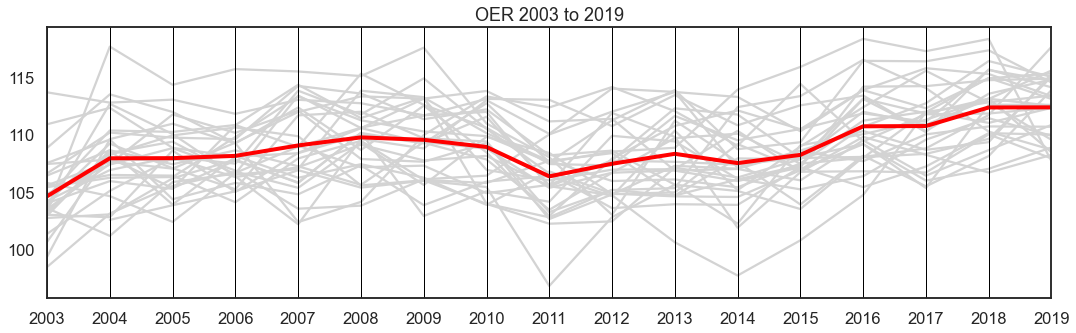

In [37]:
plt.figure(figsize=(18,5))
ax = pd.plotting.parallel_coordinates(overview.reset_index(), 'TEAM_NAME', color='lightgrey')

pd.plotting.parallel_coordinates(
        league_avg_2003_2019.reset_index()[league_avg_2003_2019.reset_index()['TEAM_NAME'] == 'League Average'], 'TEAM_NAME', ax=ax, 
        axvlines_kwds=dict(color='k', lw=1/2), 
        color='r', lw=4, alpha=1
    )


ax.legend().remove()
ax.grid(False)
ax.set_title('OER 2003 to 2019')

# Clean up
This graph is very cluttered and quite hard to read. Let's split the teams up by which conference they play in. We will also remove the years in the center because we want to see how the OER and DER has changed for the entire time period. I will also start from 2004 because the Charlotte Hornets only joined the NBA in 2004.

### Western conference dataframes

In [38]:
west_conf = seasonal_df[seasonal_df['CONFERENCE'] == 'West'].reset_index()[['TEAM_NAME', 'SEASON', 'OER', 'DER', 'NER']]
west_conf.head()

,TEAM_NAME,SEASON,OER,DER,NER
0,Pelicans,2003,103.583771,104.154912,-0.571141
1,Mavericks,2003,113.706328,109.219858,4.486470
2,Nuggets,2003,105.571466,104.998048,0.573418
3,Warriors,2003,105.416207,106.023931,-0.607723
4,Rockets,2003,102.921735,101.200686,1.721048


In [39]:
west_graph = west_conf.pivot(index='TEAM_NAME', columns='SEASON', values='OER')[[2004,2019]]
west_graph.head()

SEASON,2004,2019
TEAM_NAME,,
Clippers,107.393365,115.360813
Grizzlies,108.642490,110.855924
Jazz,105.947904,115.613293
Kings,112.344322,112.611333
Lakers,110.192572,115.062002


Now get the western conference average

In [40]:
tmp = west_graph.reset_index().copy()
tmp['TEAM_NAME'] = 'West Average'
west_avg = tmp.groupby(['TEAM_NAME']).mean().copy()
west_avg

SEASON,2004,2019
TEAM_NAME,,
West Average,109.12211,113.496855


### Eastern conference dataframes

In [41]:
east_conf = seasonal_df[seasonal_df['CONFERENCE'] == 'East'].reset_index()[['TEAM_NAME', 'SEASON', 'OER', 'DER', 'NER']]
east_conf.head()

,TEAM_NAME,SEASON,OER,DER,NER
0,Hawks,2003,102.999866,108.084594,-5.084728
1,Celtics,2003,104.054566,105.672427,-1.617861
2,Cavaliers,2003,102.983105,105.826397,-2.843293
3,Bulls,2003,98.439182,105.285100,-6.845918
4,Heat,2003,103.447860,102.858177,0.589684


In [42]:
east_graph = east_conf.pivot(index='TEAM_NAME', columns='SEASON', values='OER')[[2004,2019]]
east_graph.head()

SEASON,2004,2019
TEAM_NAME,,
76ers,105.092368,113.126228
Bucks,107.832072,115.059530
Bulls,103.110077,108.888566
Cavaliers,108.402462,108.685835
Celtics,109.222182,114.823479


Now get the Eastern conference average

In [43]:
tmp = east_graph.reset_index().copy()
tmp['TEAM_NAME'] = 'East Average'
east_avg = tmp.groupby(['TEAM_NAME']).mean().copy()
east_avg

SEASON,2004,2019
TEAM_NAME,,
East Average,106.76174,111.291607


# Offensive Efficiency Rating plot
Now that all our dataframes are prepared we can plot the OER for both conferences.

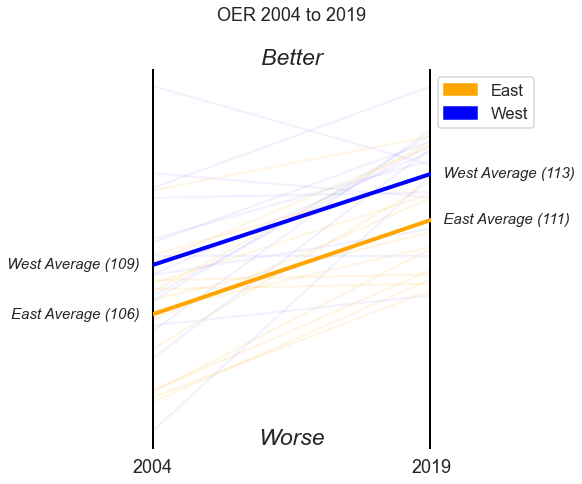

In [44]:
plt.figure(figsize=(5,7))
plt.tight_layout()
ax1 = pd.plotting.parallel_coordinates(west_graph.reset_index(), 'TEAM_NAME', color='blue', alpha=0.05)

pd.plotting.parallel_coordinates(
        east_graph.reset_index(), 'TEAM_NAME', ax=ax1, 
        axvlines_kwds=dict(color='black', lw=4), 
        color='orange', alpha=0.1
)

pd.plotting.parallel_coordinates(east_avg.reset_index(), 'TEAM_NAME', color='orange', lw=4, alpha=1)
pd.plotting.parallel_coordinates(west_avg.reset_index(), 'TEAM_NAME', color='blue', lw=4, alpha=1)

for team, row in east_avg.iterrows():
        season_2004, season_2019 = row[2004], row[2019]
        
        # Label the markers
        ax1.text(0, season_2004, '{} ({})   '.format(team, int(season_2004)), ha='right', va='center', style='oblique', fontsize=15)
        ax1.text(1, season_2019, '   {} ({})'.format(team, int(season_2019)), ha='left', va='center', style='oblique', fontsize=15)
        
for team, row in west_avg.iterrows():
        season_2004, season_2019 = row[2004], row[2019]
        
        # Label the markers
        ax1.text(0, season_2004, '{} ({})   '.format(team, int(season_2004)), ha='right', va='center', style='oblique', fontsize=15)
        ax1.text(1, season_2019, '   {} ({})'.format(team, int(season_2019)), ha='left', va='center', style='oblique', fontsize=15)
        
east = mpatch.Patch(color='orange', label='East')
west = mpatch.Patch(color='blue', label='West')
ax1.text(0.5, ax1.get_ylim()[0], 'Worse', ha='center', va='bottom', style='oblique', fontsize=23)
ax1.text(0.5, ax1.get_ylim()[1], 'Better', ha='center', va='bottom', style='oblique', fontsize=23)
ax1.text(0, 99, '2004', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax1.text(1, 99, '2019', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax1.legend(handles=[east, west], loc='upper right', bbox_to_anchor=(1.4, 1))
ax1.axis('off')
ax1.set_title('OER 2004 to 2019\n\n')
plt.savefig('../../../graphs/1100_OER_2004_to_2019.png',bbox_inches='tight');

# Defensive Efficiency Rating plot
We will now prepare the DER dataframes for eahc conference.

### Western conference dataframes

In [45]:
west_DER = west_conf.pivot(index='TEAM_NAME', columns='SEASON', values='DER')[[2004,2019]]
west_DER.head(1)

SEASON,2004,2019
TEAM_NAME,,
Clippers,108.960087,110.276855


In [46]:
tmp = west_DER.reset_index().copy()
tmp['TEAM_NAME'] = 'West Average'
west_avg_DER = tmp.groupby(['TEAM_NAME']).mean().copy()
west_avg_DER

SEASON,2004,2019
TEAM_NAME,,
West Average,108.594652,113.332181


### Eastern conference dataframes

In [47]:
east_DER = east_conf.pivot(index='TEAM_NAME', columns='SEASON', values='DER')[[2004,2019]]
east_DER.head(1)

SEASON,2004,2019
TEAM_NAME,,
76ers,106.832298,110.309907


In [48]:
tmp = east_DER.reset_index().copy()
tmp['TEAM_NAME'] = 'East Average'
east_avg_DER = tmp.groupby(['TEAM_NAME']).mean().copy()
east_avg_DER

SEASON,2004,2019
TEAM_NAME,,
East Average,107.915228,112.479179


# Defensive Efficiency Rating plot
Now that all our dataframes are prepared we can plot the DER for both conferences.

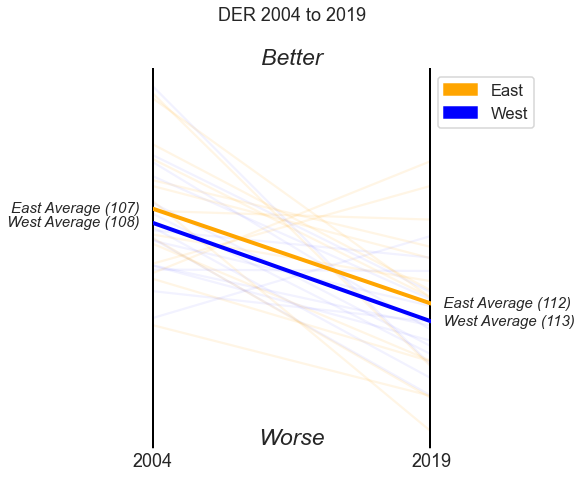

In [49]:
plt.figure(figsize=(5,7))
plt.tight_layout()

ax2 = pd.plotting.parallel_coordinates(west_DER.reset_index(), 'TEAM_NAME', color='blue', alpha=0.05)

ax2 = pd.plotting.parallel_coordinates(
        east_DER.reset_index(), 'TEAM_NAME', ax=ax2, 
        axvlines_kwds=dict(color='black', lw=4), 
        color='orange', alpha=0.1
)

ax2 = pd.plotting.parallel_coordinates(east_avg_DER.reset_index(), 'TEAM_NAME', color='orange', lw=4, alpha=1)
ax2 = pd.plotting.parallel_coordinates(west_avg_DER.reset_index(), 'TEAM_NAME', color='blue', lw=4, alpha=1)

for team, row in east_avg_DER.iterrows():
        season_2004, season_2019 = row[2004], row[2019]
        
        # Label the markers
        ax2.text(0, season_2004, '{} ({})   '.format(team, int(season_2004)), ha='right', va='center', style='oblique', fontsize=15)
        ax2.text(1, season_2019, '   {} ({})'.format(team, int(season_2019)), ha='left', va='center', style='oblique', fontsize=15)
        
for team, row in west_avg_DER.iterrows():
        season_2004, season_2019 = row[2004], row[2019]
        
        # Label the markers
        ax2.text(0, season_2004, '{} ({})   '.format(team, int(season_2004)), ha='right', va='center', style='oblique', fontsize=15)
        ax2.text(1, season_2019, '   {} ({})'.format(team, int(season_2019)), ha='left', va='center', style='oblique', fontsize=15)
        
ax2.invert_yaxis()
ax2.legend(handles=[east, west], loc='upper right', bbox_to_anchor=(1.4, 1))
ax2.axis('off')
ax2.text(0.5, ax2.get_ylim()[0], 'Worse', ha='center', va='bottom', style='oblique', fontsize=23)
ax2.text(0.5, ax2.get_ylim()[1], 'Better', ha='center', va='bottom', style='oblique', fontsize=23)
ax2.text(0, 120.5, '2004', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax2.text(1, 120.5, '2019', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax2.set_title('DER 2004 to 2019\n\n')
plt.savefig('../../../graphs/1100_DER_2004_to_2019.png',bbox_inches='tight');

# Pace

In [50]:
game_df = pd.read_csv(EFFICIENCY_RATING_DATASET)
game_df.shape

(46724, 31)

In [51]:
game_df

,GAME_DATE_EST,SEASON,GAME_ID,TEAM_ID,HOME,FGM,FGA,FG_PCT,FG3M,FG3A,...,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,DER,POSSESSIONS_OPP,NER,TEAM_NAME
0,2003-10-05,2003,10300001,1610612742,False,34.0,76.0,0.447368,2.0,8.0,...,34.0,85.0,91.0,0.934066,93.406593,90.0,100.000000,90.0,-6.593407,Mavericks
1,2003-10-05,2003,10300001,1610612762,True,32.0,70.0,0.457143,1.0,7.0,...,26.0,90.0,90.0,1.000000,100.000000,85.0,93.406593,91.0,6.593407,Jazz
2,2003-10-06,2003,10300002,1610612749,False,32.0,75.0,0.426667,2.0,13.0,...,26.0,94.0,101.0,0.930693,93.069307,105.0,101.941748,103.0,-8.872441,Bucks
3,2003-10-06,2003,10300002,1610612763,True,40.0,81.0,0.493827,4.0,15.0,...,35.0,105.0,103.0,1.019417,101.941748,94.0,93.069307,101.0,8.872441,Grizzlies
4,2003-10-07,2003,10300003,1610612739,False,38.0,77.0,0.493506,4.0,6.0,...,33.0,100.0,99.0,1.010101,101.010101,96.0,95.049505,101.0,5.960596,Cavaliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,2020-10-09,2019,41900405,1610612748,False,38.0,83.0,0.457831,14.0,33.0,...,19.0,111.0,93.0,1.193548,119.354839,108.0,120.000000,90.0,-0.645161,Heat
46720,2020-10-11,2019,41900406,1610612747,False,43.0,89.0,0.483146,11.0,35.0,...,22.0,106.0,91.0,1.164835,116.483516,93.0,104.494382,89.0,11.989134,Lakers
46721,2020-10-11,2019,41900406,1610612748,True,35.0,79.0,0.443038,10.0,28.0,...,18.0,93.0,89.0,1.044944,104.494382,106.0,116.483516,91.0,-11.989134,Heat
46722,2020-08-15,2019,51900111,1610612757,True,38.0,84.0,0.452381,15.0,40.0,...,19.0,126.0,102.0,1.235294,123.529412,122.0,118.446602,103.0,5.082810,Trail Blazers


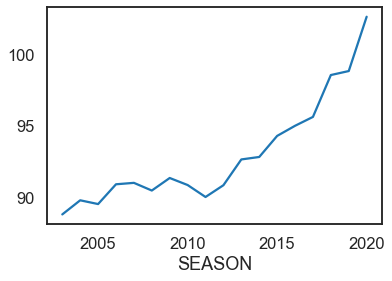

In [52]:
game_df.groupby(['SEASON']).mean()['POSSESSIONS'].plot();

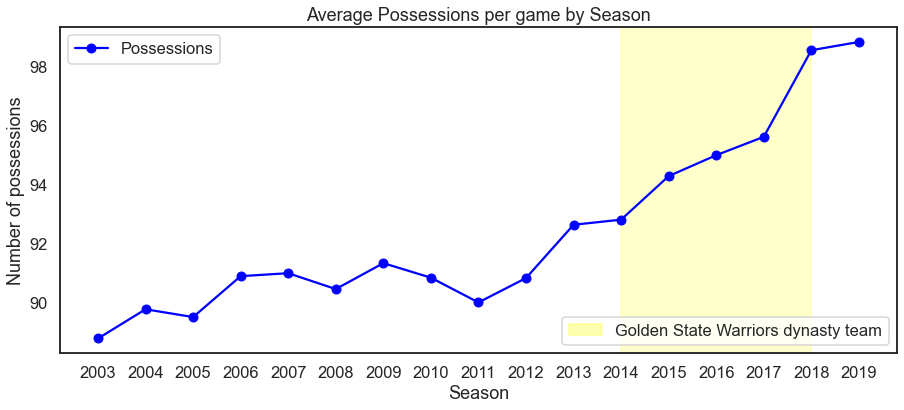

In [53]:
fig, ax = plt.subplots(figsize=(15,6))

x = game_df.groupby(['SEASON']).mean()['POSSESSIONS']
x = x.loc[2003:2019]

ax.plot(x, label="Possessions", marker='o', color='blue')

ax.set_xlabel('Season')
ax.set_ylabel('Number of possessions')
ax.set_xticks([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

gsw = plt.axvspan(2014, 2018, color='yellow', alpha=0.2)


leg1 = plt.legend(loc='upper left')
ax.legend([gsw],['Golden State Warriors dynasty team'], loc="lower right")
yellow_patch = mpatches.Patch(color='yellow', alpha=0.3, label='Golden State Warriors dynasty team')
plt.legend(handles=[yellow_patch], loc='lower right')
ax.add_artist(leg1)

ax.set_title('Average Possessions per game by Season')
plt.savefig('../../../graphs/1100_pace_by_season.png',bbox_inches='tight');

# Clear dataframes
This project contains many dataframes. To make sure we don't run out of memory we will delete our dataframes at the end of each notebook.

In [54]:
%reset -f